In [57]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_34/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


## Introducción

En este checkpoint vamos a realizar un modelo de clasificación basado en árboles de decisión para predecir si una pelicula va a obtener un premio oscar o no. Veremos como graficar los árboles de decisión obtenidos y como varía la precisión luego de limitar la profundidad del mismo.


## Dataset

En esta clase usaremos un dataset con info de películas ("Movie_classification.csv").  
Este dataset esta conformado por los siguientes features:  

 *   **Marketing expense:**    (float64)    Gasto total en Marketing      
 *   **Production expense:**   (float64)    Gasto total de Producción
 *   **Multiplex coverage:**   (float64)    Cobertura promedio de Multiplex
 *   **Budget:**               (float64)    Presupuesto
 *   **Movie_length:**         (float64)    Duración de la película
 *   **Lead_ Actor_Rating:**   (float64)    Puntaje sobre el actor principal
 *   **Lead_Actress_rating:**  (float64)    Puntaje sobre la actriz principal
 *   **Director_rating:**      (float64)    Puntaje sobre el Director
 *   **Producer_rating:**      (float64)    Puntaje sobre el Productor
 *   **Critic_rating:**        (float64)    Puntaje que le puso la crítica
 *   **Trailer_views:**        (int64)      Cantidad de vistas del Trailer
 *   **3D_available:**         (object)     Si esta disponible en 3D (Yes/No)
 *   **Time_taken:**           (float64)    Duración de la película
 *   **Twitter_hastags:**      (float64)    Cantidad de menciones en twitter
 *   **Genre:**                (object)     Genero de la película
 *   **Avg_age_actors:**       (int64)      Edad promedio de los actores
 *   **Num_multiplex:**        (int64)      Cantidad de Multiplex
 *   **Collection:**           (int64)      Recaudación
 *   **Start_Tech_Oscar:**     (int64)      Si recibió un oscar o no.
 
 


## Imports

In [58]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

## Ejercicio 1 - Importar datos

1) Leamos los datos de "Movie_classification.csv" y lo guardamos en un dataframe de pandas.  
2) Veamos cuántos registros hay en cada DataFrame y de qué tipos son los datos de cada columna.   
3) Veamos los primeros registros de cada DataFrame para verificar que los datos fueron importados correctamente.

In [59]:
df = pd.read_csv("../Data/Movie_classification.csv", header=0)

In [60]:
df.shape

(506, 19)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [62]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


## Ejercicio 2 - Imputación de valores faltantes

Veamos si existen valores faltantes y en tal caso imputemos los mismos.

In [63]:
#vemos la cantidad de valores que tiene cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [64]:
# observamos que time_taken es la unica columna que no tiene 506 observaciónes, 
# por ende vamos a imputar los valores faltantes utilizando la media.
df['Time_taken'].mean()

157.39149797570855

In [65]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Ejercicio 3 - Generación de Variables Dummies.

Veamos si existen variables categóricas y en tal caso generar variables dummies para dichas columnas.

In [67]:
df.dtypes.loc[df.dtypes=="object"]  

3D_available    object
Genre           object
dtype: object

In [68]:
df[['3D_available','Genre']].head()

,3D_available,Genre
0,YES,Thriller
1,NO,Drama
2,NO,Comedy
3,YES,Drama
4,NO,Drama


In [69]:
df.Genre.unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [70]:
df["3D_available"].unique()

array(['YES', 'NO'], dtype=object)

In [71]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True)

In [72]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


## Ejercicio 4 - Features, Target

Construyamos una matriz de features (X) y el vector target (Y) para predecir `Start_Tech_Oscar` en el dataset de datos completos

¿Qué valores toma la variable `Start_Tech_Oscar` en el dataset?


In [73]:
df.columns!="Start_Tech_Oscar"

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True])

In [74]:
X = df.loc[:,df.columns!="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [75]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [76]:
X.shape

(506, 20)

In [77]:
y = df["Start_Tech_Oscar"]
type(y)

pandas.core.series.Series

In [78]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [79]:
y.shape

(506,)

## Ejercicio 5 - Train Test Split

Constuyamos los conjuntos de train y test, asignando el 70% de los registros a train y el 30% a test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [82]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,143.48,284.592,53,460,57400,1,1,0,0
116,22.6316,75.02,0.453,34307.680,146.0,8.535,8.645,8.500,8.860,8.44,432696,130.48,263.392,23,528,42400,0,1,0,0
45,23.4284,68.82,0.552,31563.510,107.3,7.385,7.525,7.395,7.490,8.42,470466,161.72,223.088,21,445,38600,0,0,0,1
16,41.0786,71.28,0.462,32968.925,102.8,7.670,7.805,7.740,7.785,7.80,532331,109.24,203.696,46,547,46200,0,1,0,0
468,331.5140,91.20,0.420,32918.930,144.5,8.520,8.550,8.440,8.670,6.96,383739,117.64,303.056,28,494,38200,0,1,0,0


In [83]:
X_train.shape

(354, 20)

In [84]:
X_test.shape

(152, 20)

## Ejercicio 6 - Entrenamos el árbol de clasificación
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

Entrenemos el árbol de clasificación y realizar las predicciones tanto para el dataset de entrenamiento como el de pruebas


In [85]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(random_state=40)

In [86]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [87]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

## Ejercicio 7 - Verificamos la performance del modelo
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html  

Importemos las librerías de `accuracy_score`  y `confusion_matrix` para analizar la performance de nuestro modelo tanto para el dataset de entrenamiento como el de pruebas 


Recordamos que la matriz de confusión tiene la siguiente forma:

<img style="float: center;" src="img/matriz_confusion.png">

<img style="float: center;" src="img/matriz_confusion_2.png">

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
confusion_matrix(y_train, y_train_pred)

array([[165,   0],
       [  0, 189]])

In [90]:
confusion_matrix(y_test, y_test_pred)

array([[36, 29],
       [37, 50]])

In [91]:
accuracy_score(y_test, y_test_pred)

0.5657894736842105

Los árboles de decisión implementados en scikit-learn ofrecen un atributo llamado `feature_importances_`. Es la contribunción a la reducción de las impurezas a lo largo de todo el árbol. 

In [92]:
pd.DataFrame({'atributo':X.columns, 'importancia':clftree.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
15,Collection,0.121426
7,Director_rating,0.107550
0,Marketing expense,0.096130
3,Budget,0.090591
4,Movie_length,0.074211
14,Num_multiplex,0.071997
11,Time_taken,0.068205
10,Trailer_views,0.068138
12,Twitter_hastags,0.060922
9,Critic_rating,0.043197


## Ejercicio 8 - Graficamos el modelo de ML.

Es necesario tener instaladas las librerias de `graphviz` y `pydotplus`

```
> conda install graphviz
> pip install pydotplus
```

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html  
https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/


In [93]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [94]:
from IPython.display import Image

In [95]:
import pydotplus

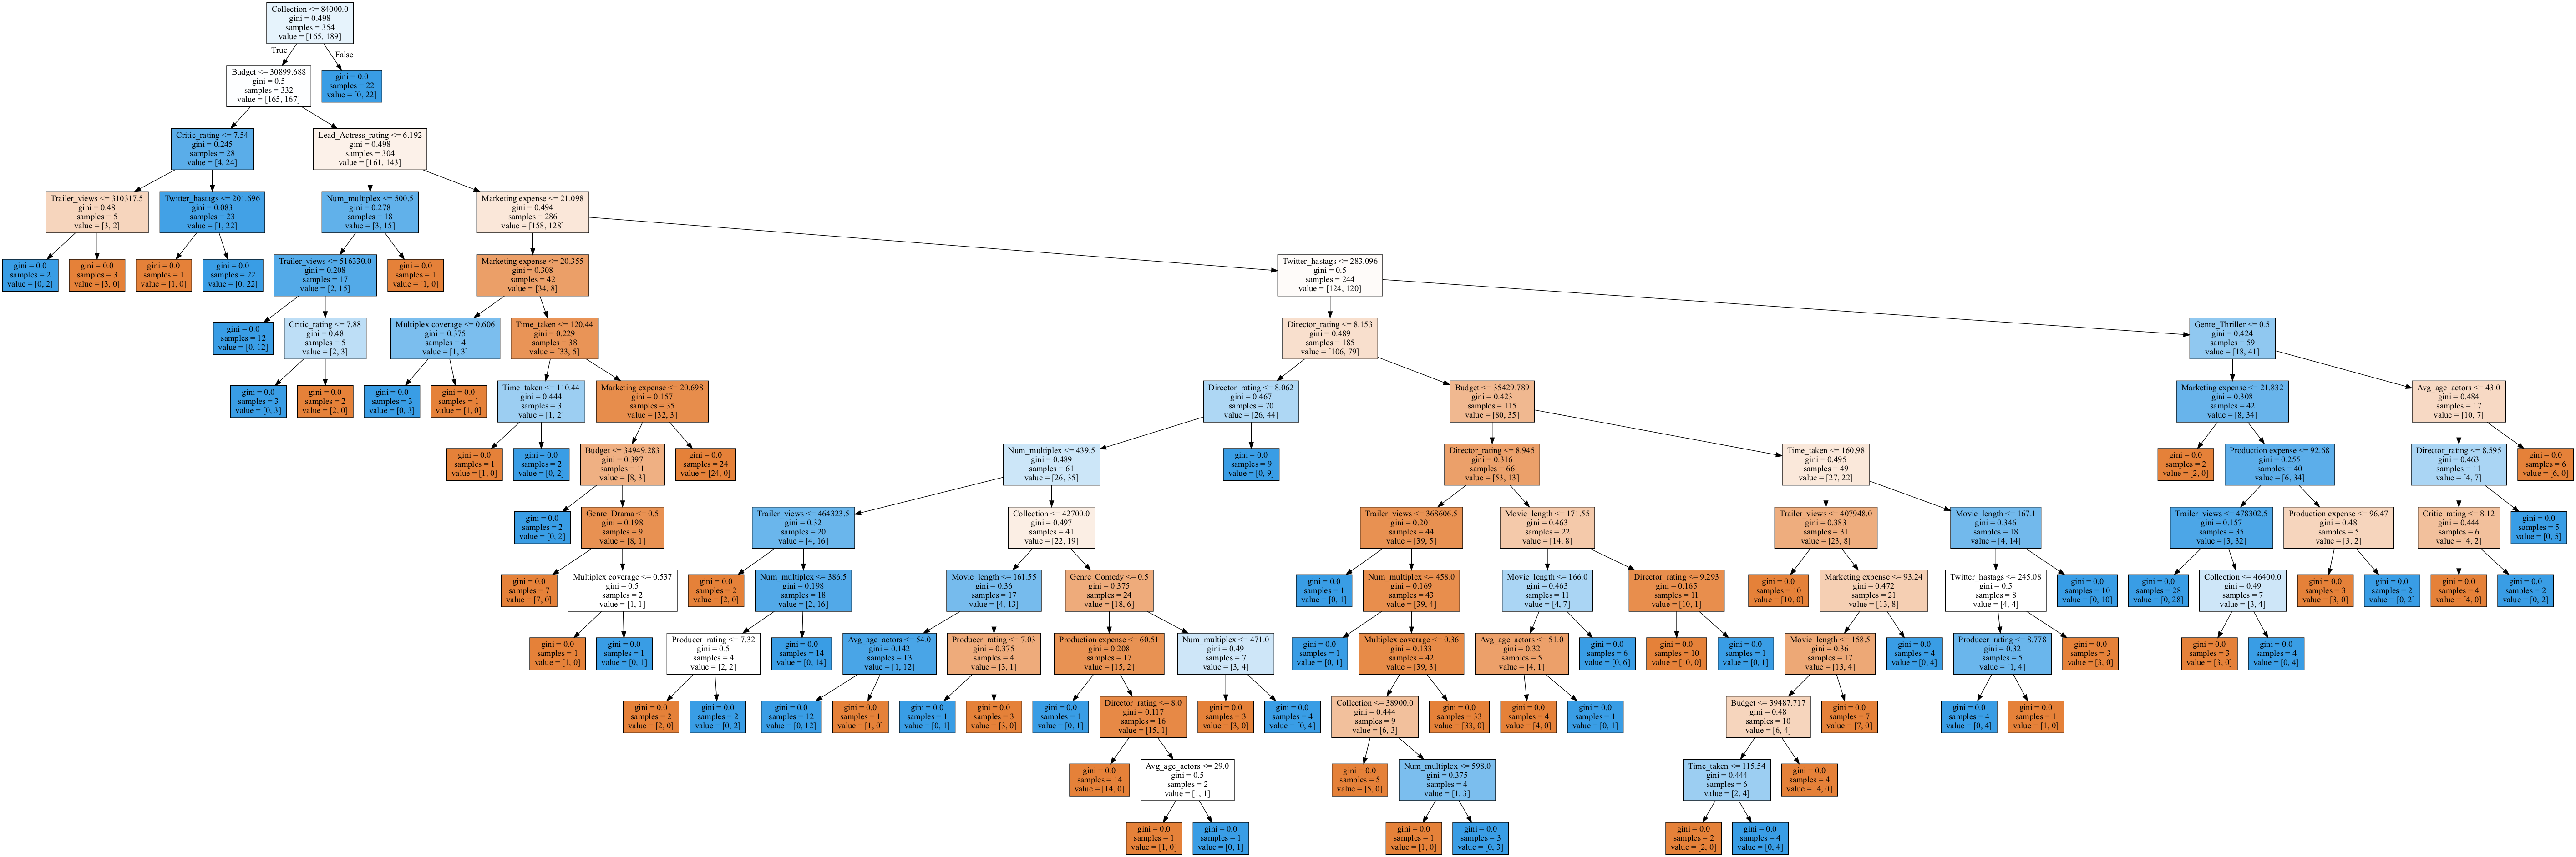

In [96]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Ejercicio 9 - Analizamos como varía la performance al reducir la altura del árbol (tree prunning).

Realizamos tree prunning definiendo los siguientes hiper-parámetros:
 - min_samples_leaf = 20
 - max_depth = 4  
 
Luego graficamos el árbol entrenado y verificamos la performance en el dataset de pruebas.
 

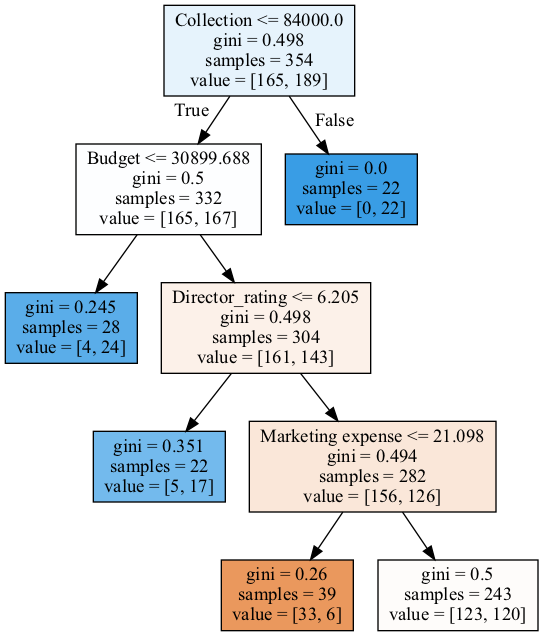

In [97]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4, random_state=40)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [98]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5789473684210527

In [99]:
confusion_matrix(y_test, clftree2.predict(X_test))

array([[58,  7],
       [57, 30]])

In [100]:
pd.DataFrame({'atributo':X.columns, 'importancia':clftree2.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
15,Collection,0.340126
0,Marketing expense,0.259252
3,Budget,0.255942
7,Director_rating,0.144680
11,Time_taken,0.000000
18,Genre_Drama,0.000000
17,Genre_Comedy,0.000000
16,3D_available_YES,0.000000
14,Num_multiplex,0.000000
13,Avg_age_actors,0.000000


## Ejercicio 10 - Optimizamos nuestro árbol de decisión ajustando los hiperparámetros mediante el uso de gridsearch.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  

Optimizamos el modelo, aplicando gridseach con los siguientes hiperparametros:

```python 
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,None],
                "min_samples_split": [2, 3, 4,None]}
``` 



In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
clftree = tree.DecisionTreeClassifier(random_state=40)

In [103]:
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,None],
                "min_samples_split": [2, 3, 4,None]}

In [104]:
grid_search = GridSearchCV(clftree, params_grid,
                           n_jobs=-1, scoring='accuracy')

In [105]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13,
                                       14, None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [106]:
#Score durante el entrenamiento.
grid_search.best_score_

0.6414084507042255

In [107]:
cv_clf = grid_search.best_estimator_

In [108]:
cv_clf

DecisionTreeClassifier(max_depth=9, min_samples_leaf=15, random_state=40)

In [109]:
accuracy_score(y_test, cv_clf.predict(X_test))

0.5789473684210527

In [110]:
confusion_matrix(y_test, cv_clf.predict(X_test))

array([[36, 29],
       [35, 52]])

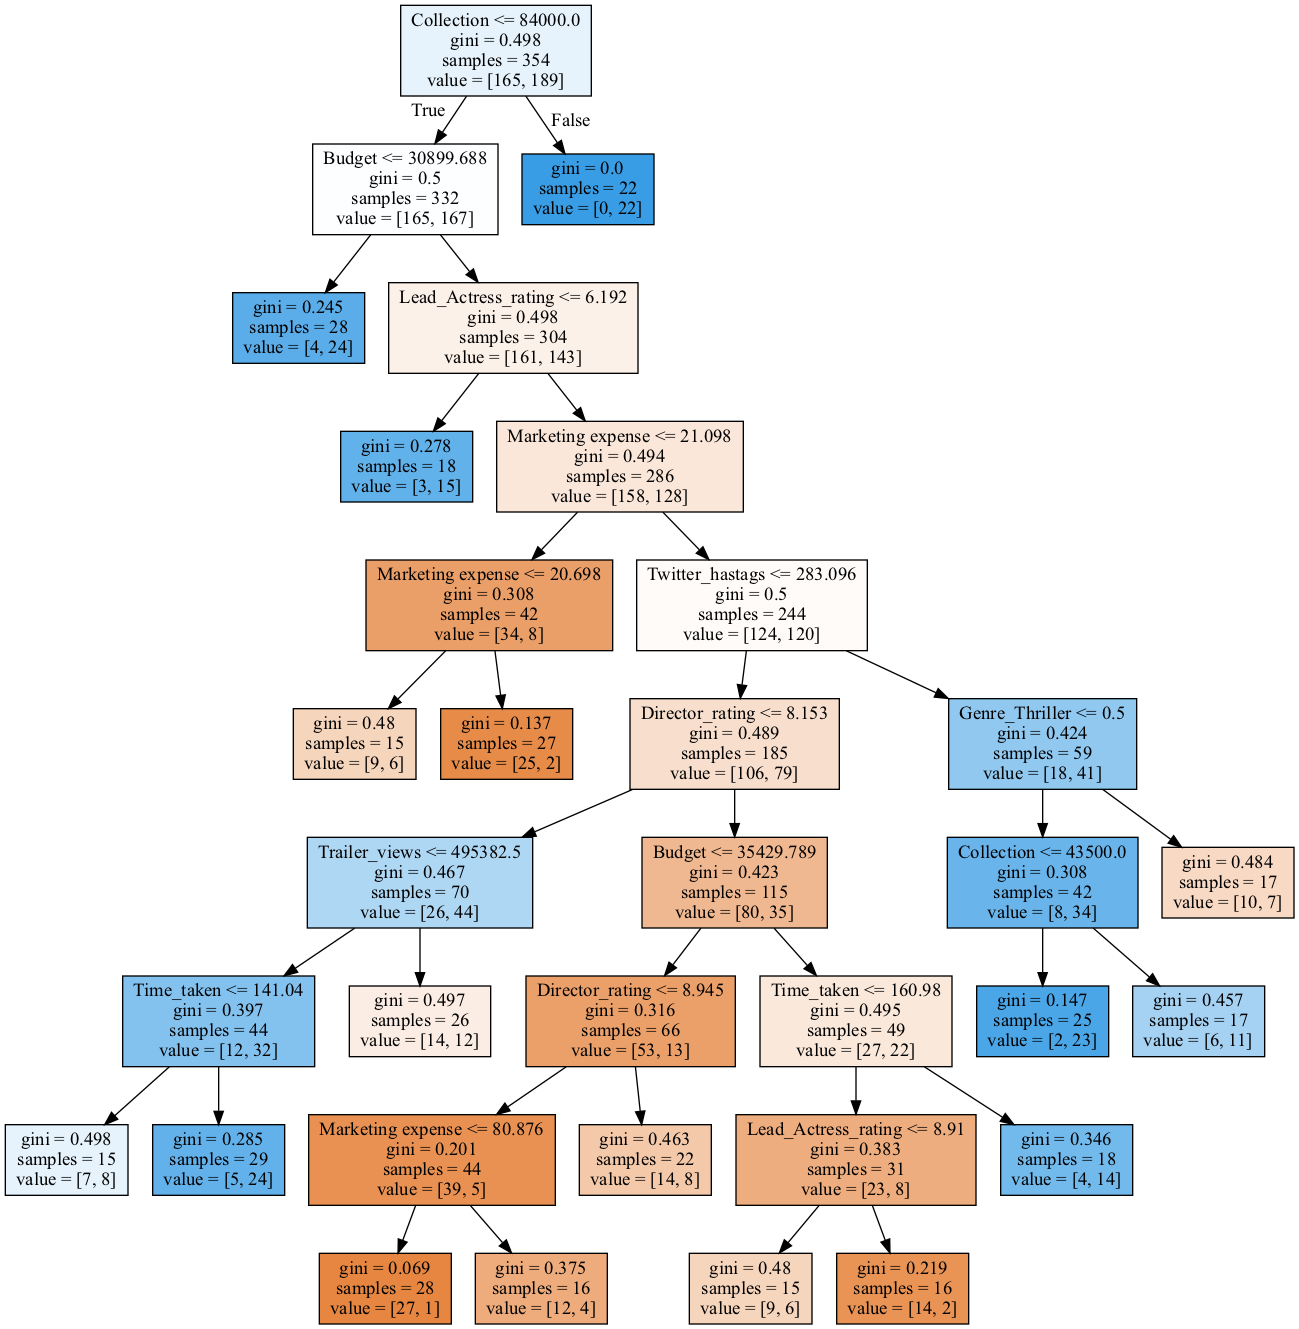

In [111]:
dot_data = tree.export_graphviz(cv_clf, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [112]:
pd.DataFrame({'atributo':X.columns, 'importancia':cv_clf.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
15,Collection,0.167032
3,Budget,0.160487
7,Director_rating,0.156775
0,Marketing expense,0.135490
11,Time_taken,0.112263
12,Twitter_hastags,0.091660
6,Lead_Actress_rating,0.088676
19,Genre_Thriller,0.054667
10,Trailer_views,0.032950
8,Producer_rating,0.000000
